In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os



#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [61]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["/Data/DS30_r"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 27
Loading... Folder 1 of 1, Sample 2 of 27
Loading... Folder 1 of 1, Sample 3 of 27
Loading... Folder 1 of 1, Sample 4 of 27
Loading... Folder 1 of 1, Sample 5 of 27
Loading... Folder 1 of 1, Sample 6 of 27
Loading... Folder 1 of 1, Sample 7 of 27
Loading... Folder 1 of 1, Sample 8 of 27
Loading... Folder 1 of 1, Sample 9 of 27
Loading... Folder 1 of 1, Sample 10 of 27
Loading... Folder 1 of 1, Sample 11 of 27
Loading... Folder 1 of 1, Sample 12 of 27
Loading... Folder 1 of 1, Sample 13 of 27
Loading... Folder 1 of 1, Sample 14 of 27
Loading... Folder 1 of 1, Sample 15 of 27
Loading... Folder 1 of 1, Sample 16 of 27
Loading... Folder 1 of 1, Sample 17 of 27
Loading... Folder 1 of 1, Sample 18 of 27
Loading... Folder 1 of 1, Sample 19 of 27
Loading... Folder 1 of 1, Sample 20 of 27
Loading... Folder 1 of 1, Sample 21 of 27
Loading... Folder 1 of 1, Sample 22 of 27
Loading... Folder 1 of 1, Sample 23 of 27
Loading... Folder 1 of 1, Sample 24 of 27
L

In [69]:
data[0][3]

,presFesto-1,AWM5-5,MPX700-2,Time
0,-0.000025,-0.000882,-141.422300,0.001
1,0.000098,-0.000765,-94.386727,0.002
2,0.000187,-0.000674,-55.485125,0.003
3,0.000244,-0.000605,-24.021750,0.004
4,0.000274,-0.000556,0.699143,0.005
...,...,...,...,...
60295,0.001022,-0.000690,19.506592,60.296
60296,0.001008,-0.000496,21.205503,60.297
60297,0.000996,-0.000123,23.339737,60.298
60298,0.000989,0.000456,25.947045,60.299


In [50]:
len(data[0])

9

Text(0.5, 0, 'Time [s]')

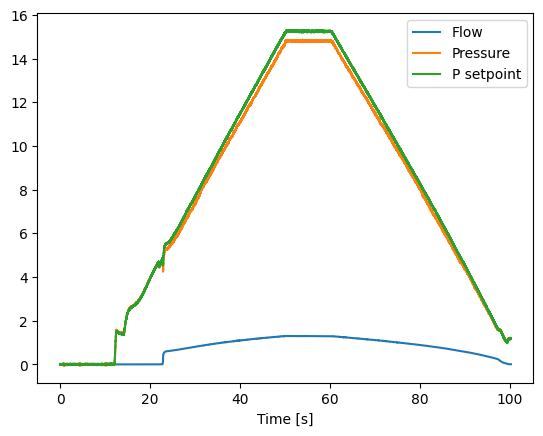

In [3]:
k =len(data[0])-5
flow = data[0][k]['AWM5-5'].values #SLPM
P = data[0][k]['SSCDP15-3'].values # Pa 
time = data[0][k]['Time']

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.plot(time,data[0][k]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')

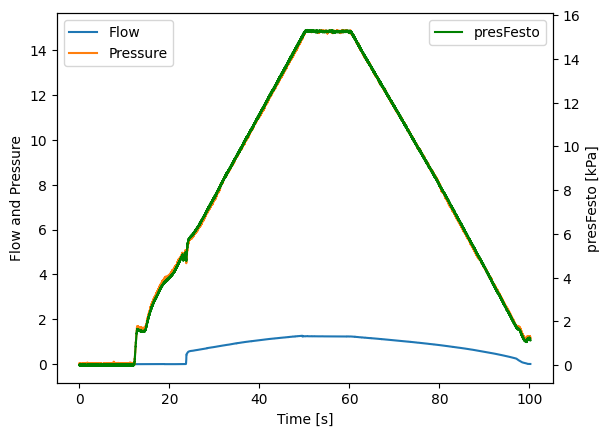

In [45]:
import matplotlib.pyplot as plt

k = 3
flow = data[0][k]['AWM5-5'].values  # SLPM
P = data[0][k]['SSCDP15-3'].values  # Pa
time = data[0][k]['Time']

fig, ax1 = plt.subplots()

# Plotting Flow and Pressure on the left y-axis
ax1.plot(time, flow, label='Flow')
ax1.plot(time, P/1000, label='Pressure')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Flow and Pressure')
ax1.legend(loc='upper left')

# Create a second y-axis to plot presFesto
ax2 = ax1.twinx()
ax2.plot(time, data[0][k]['presFesto-1']*100, 'g-', label='presFesto')
ax2.set_ylabel('presFesto [kPa]')
ax2.legend(loc='upper right')

plt.show()

In [23]:
plt.figure(figsize=[10, 5]) # Optional, set the size of the plot
linetypes = ['-', '--', '-.', ':'] # Define a list of linetypes

for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    P = data[0][i]['MPX100-10'].values # Pa 
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]

    plt.plot(time, P/1000,linetype,label="Pressure"+str(i))
    plt.xlabel('Time [s]')
    plt.ylabel('Pressure [kPa]')
    plt.legend(loc="upper left")

# Create a twin y-axis to plot the flow on the right side
ax2 = plt.gca().twinx()
for i in range(len(data[0])):
    flow = data[0][i]['AWM20-12'].values #SLPM
    time = data[0][i]['Time']

    # Select linetype using the modulo operator to loop through the linetypes list
    linetype = linetypes[i % len(linetypes)]
    
    ax2.plot(time, flow,linetype, color='r', label='Flow'+str(i))
    ax2.set_ylabel('Flow [SLPM]')
    ax2.legend(loc="upper right")

ax2.set_ylim(-0.5, 5)
plt.ylim(-0.5, 10)
plt.show()


KeyError: 'AWM20-12'

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Flow [SLPM]')

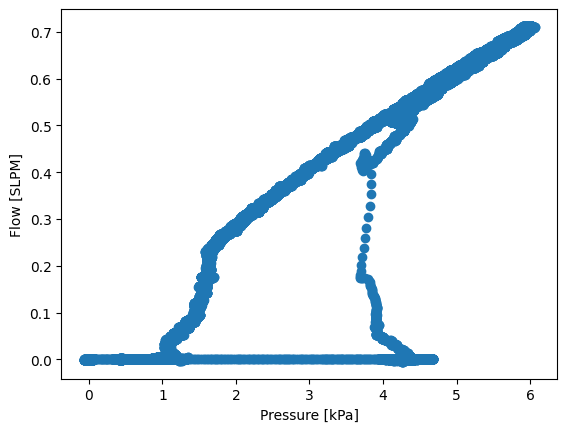

In [53]:
plt.scatter(P/1000,flow)
plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)




In [74]:
plt.figure()  # Create a new figure for each experiment
for i, df in [0,1,2,3,4]:#enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.plot( P/1000,flow, label=data[1]['Samplename'][i][5:])
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='lower right')
    #plt.title(f'Experiment {i+1}')
  
#plt.xlim(3.5,5.5) 
plt.grid()
plt.show() 

TypeError: cannot unpack non-iterable int object

<Figure size 640x480 with 0 Axes>

In [72]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

In [22]:
# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')


C:\Users\vaarkamp\AppData\Local\Temp\ipykernel_21312\3931365136.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')
